# Logistic Regresssion

## Load X,y data from NPZ

Using the function added to *mylib.py* file, it's now easy to grab data and X/y vectors ready to be used for model training and tuning

In [15]:
# Run content of mylib.py file
%run mylib.py

# Load data from NPZ file
#data=loadNpz()
(data, X, y)=loadXy(verbose=False)

## Evaluate without any hyperparameters tuning

To do so, I will simply create a LogisticRegression estimator object using default parameters, fit it, and evaluate it agains the *test* dataset.

> Note: I've explicitly set some hyperparameters to avoid warnings about default values that will be changed in the future.


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Cross Validation K-Fold dimension
CV=5

# Create LogisticRegression object with default values
lr=LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000)

# Set grid parameters for regularization strenght tuning
# Not that for this first run, we do no tune this param, so I set it to default=1.0
grid_param={
    'C': [1.0]
}

grid_lr=GridSearchCV(lr, grid_param, cv=CV, refit=True, return_train_score=True, verbose=True, n_jobs=-1, iid=True)

grid_lr.fit(X['trainX'], y['trainX'])

accuracy_lr=grid_lr.score(X['test'], y['test'])*100

print("\n")
print("LogisticRegression score : {:.1f}%".format(accuracy_lr))


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished




LogisticRegression score : 96.1%


## Do some regularization strenght tuning with GridSearchCV

In [4]:

# Set C parameters to a range of values
grid_param={
    'C': np.logspace(-7, 1, num=50),
}

grid_lr=GridSearchCV(lr, grid_param, cv=CV, refit=True, return_train_score=True, verbose=True, n_jobs=-1, iid=True)

grid_lr.fit(X['trainX'], y['trainX'])




Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-07, 1.45635e-07, 2.12095e-07, 3.08884e-07, 4.49843e-07,
       6.55129e-07, 9.54095e-07, 1.38950e-06, 2.02359e-06, 2.94705e-06,
       4.29193e-06, 6.25055e-06, 9.10298e-06, 1.32571e-05, 1.93070e-05,
       2.81177e-05, 4.09492e-05, 5.96362e-05, 8.68511e-05, 1.26486e... 1.04811e+00, 1.52642e+00,
       2.22300e+00, 3.23746e+00, 4.71487e+00, 6.86649e+00, 1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [8]:
columns=['param_C', 'mean_test_score', 'std_test_score', 'mean_train_score']
results_df=pd.DataFrame(grid_lr.cv_results_).sort_values('mean_test_score', ascending=False)[columns]

results_df.head()

,param_C,mean_test_score,std_test_score,mean_train_score
49,10,0.935714,0.017123,1.000000
44,1.52642,0.935714,0.011312,1.000000
32,0.0167683,0.935714,0.016287,0.984527
33,0.0244205,0.935714,0.016287,0.987500
37,0.109854,0.935714,0.010676,1.000000


In [9]:
best_lr=grid_lr.best_estimator_

best_accuracy_lr=best_lr.score(X['test'], y['test'])*100

print("LogisticRegression score : {:.1f}%".format(best_accuracy_lr))



LogisticRegression score : 96.1%


In [10]:
saveModel(best_lr, 'logistic')

Saving model logistic to model-logistic.sav


## Compute probability

Image index selected from the 'test' dataset [0, 3, 10, 15, 43, 60, 65, 72, 87, 101]


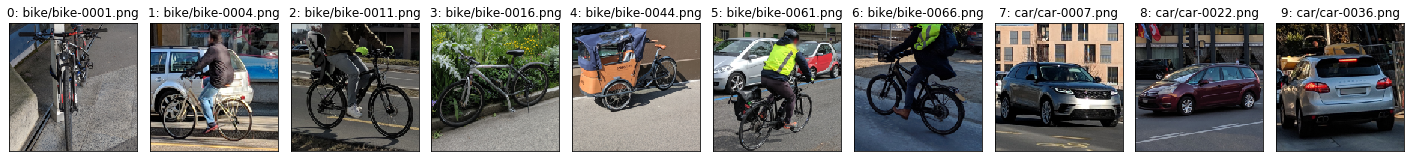

,bike,car,motorcycle,other,truck,van,labels
0,0.968233,0.005997,0.004354,0.012520,0.005204,0.003691,bike/bike-0001.png
1,0.824376,0.101054,0.007959,0.013540,0.006526,0.046545,bike/bike-0004.png
2,0.983749,0.003954,0.004641,0.005011,0.001544,0.001101,bike/bike-0011.png
3,0.970038,0.008058,0.005800,0.009591,0.003509,0.003003,bike/bike-0016.png
4,0.814652,0.033982,0.052357,0.047090,0.037058,0.014861,bike/bike-0044.png
5,0.961609,0.013966,0.012144,0.002964,0.002016,0.007301,bike/bike-0061.png
6,0.984563,0.001953,0.008273,0.003223,0.000832,0.001156,bike/bike-0066.png
7,0.015210,0.717083,0.010205,0.010608,0.027362,0.219532,car/car-0007.png
8,0.004055,0.974755,0.002153,0.005467,0.002269,0.011301,car/car-0022.png
9,0.013265,0.903245,0.006863,0.030488,0.027399,0.018740,car/car-0036.png


In [11]:
import matplotlib.pyplot as plt

# Select images from trainX dataset
idx=[x*10 for x in range(10)]
idx=[0, 3, 10, 15, 43, 60, 65, 72, 87, 101]
print("Image index selected from the 'test' dataset",idx)

X_feature=X['train'][idx]
X_data=data['train']['data'][idx]
X_filenames=data['train']['filenames'][idx]

# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(X_data), figsize=(25, 10))

# Remove gaps between suplots
plt.subplots_adjust(wspace=0.1, hspace=0)

for i in range(0,len(X_data)):
    axes[i].imshow(np.array(X_data[i]*255, dtype=np.uint8))
    axes[i].get_xaxis().set_visible(False) # disable x-axis
    axes[i].get_yaxis().set_visible(False) # disable y-axis
    axes[i].set_title('{}: {}'.format(i, X_filenames[i]))
plt.show()


proba_df=pd.DataFrame(best_lr.predict_proba(X_feature), columns=data['class_name'])

proba_df['labels']=X_filenames
proba_df



# Add comments on the results

## Predict with different regularization strength

For a better view of the effect of the regularization stenght, I will plot a graph using the detaframe returned by the GridSearchCV.cv_results_ method. This dataframe contains the mean of train and test score based on the number of cross validation performed on the dataset.

As I might reuse this function elsewhere in the following Notebooks, I will add it to *mylib.py* file.

Here is the code that will be added to *mylib.py* file.

    def plotGridSearchResults(results_df, x_param, y_param=[], semilogx=True, xlabel='', ylabel='', title='', figsize=(15,10)):
        """
        Function to graph data points from GridSearchCV results. Can be used to graph the mean test and train
        score of a GridSearchCV fitted object.
        Note that the graph built expects % values on the Y axis (mean_test_score, mean_train_score for example) 
        Mandatory parameters are:
            results_df: A dataframe built from GridSearchCV.cv_results_
            x_param: The column name of the results_df dataframe to be used as X axis
            y_param: An array of column to be plotted on the Y axis. Those values must be %.
        Optionnal parameters:
            semilogx: If True, the X data points are plotted using a log10 scale
            xlabel: Label of the X axis
            ylabel: Label of the Y axis
            title: Title of the graph
            figsize: Size ot the graph

        The function will also determine, for each of the y_param to be plotted, which is the plot with the highest
        y_param value, and use the coordinates to draw a red cross on the plotted line, along with horizontal and
        vertical lines to the X and Y axis.
        For that purpose, the function first sort the results_df dataframe using the x_param column in ascending order.
        """
        # Order dataframe by xparam value
        temp_df=results_df.sort_values(x_param, ascending=True)

        # Define figsize
        plt.figure(figsize=figsize)

        # Store x_min, x_max, y_min and y_max values to set xlimit and ylimit of the graph
        x_min=0
        y_min=100
        x_max=0
        y_max=0

        # Loop for each yparam plot
        for i in y_param:
            # Find indices of  the best y value
            best_idx=temp_df[i].idxmax()

            # Get best x information
            best_x = temp_df[x_param][best_idx]
            # Get x plots
            x_values=temp_df[x_param]
            # Store x_min and x_max if needed
            if x_min>np.min(x_values):
                x_min=np.min(x_values)
            if x_max<np.max(x_values):
                x_max=np.max(x_values)



            # get best y information
            best_y=temp_df[i][best_idx]*100 # Multiply by 100 to get %
            # Get y plots
            y_values=temp_df[i]*100
            # Store y_min and y_max if needed
            if y_min>np.min(y_values):
                y_min=np.min(y_values)-y_values.std()
            if y_max<np.max(y_values):
                y_max=np.max(y_values)+y_values.std()

            if semilogx:
                plt.semilogx(x_values, y_values, label=i)
            else:
                plt.plot(x_values, y_values, label=i)

            # Draw a cross on the best_x/best_accuracy point
            plt.scatter(best_x, best_y, marker='x', c='red', zorder=10)
            # Write near of the cross the best_y/best_y value
            plt.text(best_x, best_y+0.5, 'x:{:.3f} y:{:.1f}'.format(best_x, best_y))
            plt.plot([best_x, best_x], [0, best_y], c='red', alpha=0.5, linestyle='--')
            plt.plot([np.min(x_values), best_x], [best_y, best_y], c='red', alpha=0.5, linestyle='--')

            plt.title(title)
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
        plt.ylim(bottom=y_min, top=y_max+1)
        plt.xlim(left=x_min, right=x_max)
        plt.legend()
        plt.show()

> Note: The code above might not be the latest one. Please check the content of *mylib.py* to get the most up to date algorythm

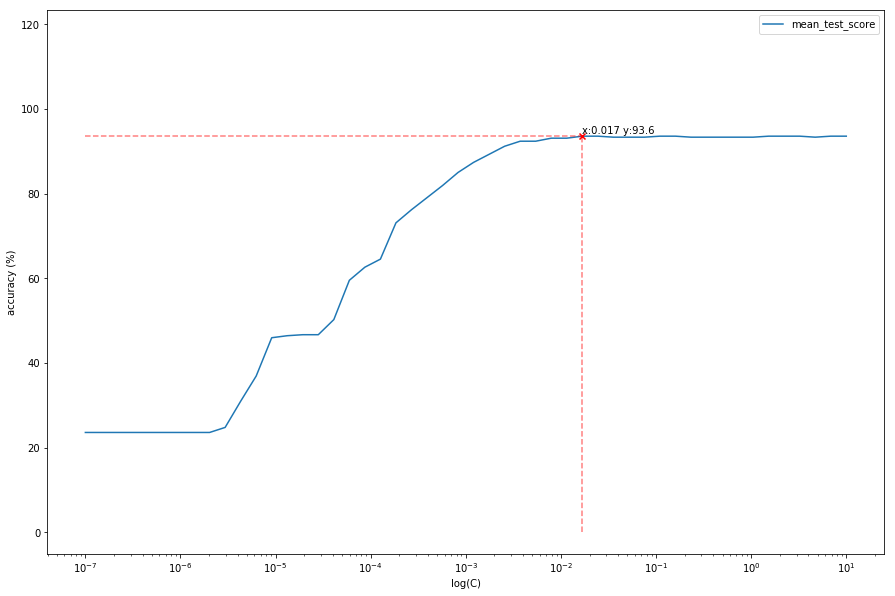

In [16]:
# Plot test curve
results_df=results_df.sort_values('param_C', ascending=True)
plotGridSearchResults(results_df, x_param='param_C', y_param=['mean_test_score'], semilogx=True, xlabel='log(C)', ylabel='accuracy (%)')

In [167]:
proba_df=pd.DataFrame({}, columns=data['class_name'])

idx=[3]
X_feature=X['train'][idx]
X_data=data['train']['data'][idx]
X_filenames=data['train']['filenames'][idx]

for C in [0.00001, 0.0001, 0.001, 0.01, 0.1]:

    # Set C parameters to a range of values
    grid_param={
        'C': [C],
    }

    grid_lr=GridSearchCV(lr, grid_param, cv=CV, refit=True, return_train_score=True, verbose=True, n_jobs=-1, iid=True)

    grid_lr.fit(X['trainX'], y['trainX'])
    
    best_lr=grid_lr.best_estimator_
    
    # proba_df=pd.DataFrame(best_lr.predict_proba(X_feature), columns=data['class_name'])
    proba_df=proba_df.append(pd.DataFrame(best_lr.predict_proba(X_feature), columns=data['class_name']), ignore_index=True)


    
    #proba_df['labels']=X_filenames
    print("Proba using C={}".format(C))
    # print(proba_df)



Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


Proba using C=1e-05
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Proba using C=0.0001
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


Proba using C=0.001
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished


Proba using C=0.01
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished


Proba using C=0.1


In [168]:
proba_df

,bike,car,motorcycle,other,truck,van
0,0.244510,0.230506,0.176403,0.112724,0.147894,0.087963
1,0.292803,0.246214,0.142049,0.103637,0.129588,0.085709
2,0.489020,0.250932,0.053934,0.064562,0.060535,0.081016
3,0.771632,0.129443,0.012009,0.019533,0.010793,0.056590
4,0.944976,0.033329,0.001438,0.002841,0.000851,0.016564
